In [2]:
import json
import numpy as np
from src import model_train_plot
from src import flops_in_folder
from src import plot_model_errors_compare


## Overall flops in this notebook
- This was intended and planned to be higher however early stopping ws enabled and resulted in very promising results with just 1/4 of the compute.

In [3]:
_, _, _ = flops_in_folder('results/Final')

Number of unique result files: 3
Total Training FLOPs: 1.275e+16
Total Evaluation FLOPs: 1.640e+15
Total Combined FLOPs: 1.439e+16
Percentage of Total FLOPs Budget:   14.39 %


# Final Training
- This uses the optimal hyperparameters which are determined in the previous notebook

In [4]:
with open("results/Final/Trained_Gen.json", "r") as f:
    results_trained = json.load(f)

with open("results/Evaluation/InitialQwenAnalysis.json", "r") as f:
    results_untrained = json.load(f)


prey_original_trained = np.array(results_trained["prey_original"])
predator_original_trained = np.array(results_trained["predator_original"])
prey_generated_trained = np.array(results_trained["prey_generated"])
predator_generated_trained = np.array(results_trained["predator_generated"])

prey_original_untrained = np.array(results_untrained["prey_original"])
predator_original_untrained = np.array(results_untrained["predator_original"])
prey_generated_untrained = np.array(results_untrained["prey_generated"])
predator_generated_untrained = np.array(results_untrained["predator_generated"])

In [5]:
with open("results/Final/FinalTraining.json", "r") as f:
    results = json.load(f)

# Access the values
train_loss_tracker = results["train_loss_tracker"]    
train_step_tracker = results["train_step_tracker"] 
val_loss_tracker = results["val_loss_tracker"]
val_step_tracker = results["val_step_tracker"]
training_flops_base = results["training_flops"]
total_eval_cost_base = results["total_eval_cost"]
final_train_loss = train_loss_tracker[-1]
val_loss_final = results["val_loss_final"]
early_stopping_step = results["early_stopping_step"]

train_loss_tracker = np.array(train_loss_tracker)
train_step_tracker = np.array(train_step_tracker)

# Trained and Untrained Trajectories
- An example of some trajectories from the test set before and after training
- These show drastically better results after training which is really encouraging, in just 1100 steps it has been able to learn the periodicity relation


<p float="left">
  <img src="plots/Untrained_1.png" width="45%" />
  <img src="plots/Trained_1.png" width="45%" />
</p>

<p float="left">
  <img src="plots/Untrained_2.png" width="45%" />
  <img src="plots/Trained_2.png" width="45%" />
</p>


<p float="left">
  <img src="plots/Untrained_3.png" width="45%" />
  <img src="plots/Trained_3.png" width="45%" />
</p>

# Final Loss Curves

### **Discussion**
- At this stage we put in a conservation number of early stopping steps (10)
- We can see that the model does the vast majority of its training within the first 50 steps, which is really intresting.
- And suggests that greatly improved results could hapeen with just 50 training steps


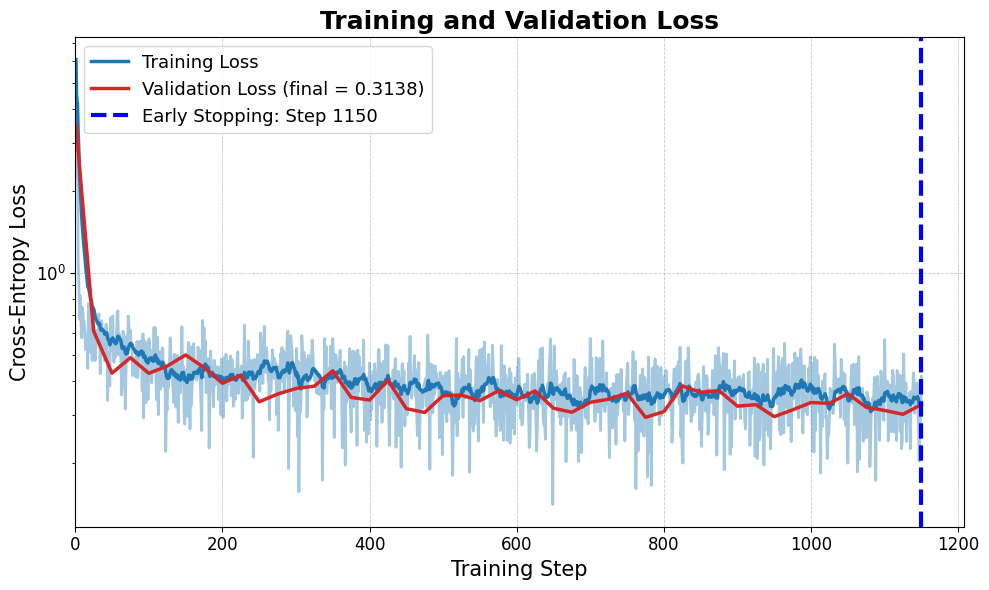

In [10]:
model_train_plot(train_step_tracker, train_loss_tracker, val_step_tracker, val_loss_tracker, val_loss_final, early_stopping_step, log_scale = True)

# 1. Cross Entropy Loss on Full Test Set

**Final Train Loss: 0.3153**

**Initial Training Loss (for comparison): 4.7794**

In [7]:
with open("results/Final/FinalTestEval.json", "r") as f:
    results = json.load(f)

# Load data from tables 
Test_loss =results["test_loss"]

print(f"Final Train Loss: {Test_loss:.4f}")

Final Train Loss: 0.3153


# 2. MSE/ MAE/ MAPE for the Test Set
- This analysis gives the MSE, MAE and MAPE for over a give number of random tests as a function of time step.

## An Explaination of the red line (Trained Context Length)
- We have used 2 decimal places which means when preprocessed each trajectory is approximately 1000 tokens. (3 signifcant figues + a decimal + either a , or ; over 200 data points )
- We have trained our model on context lenght of 768 which corrosponds to a approx 0.76% of a trajectory
- In this we use a context of 50% to try and generate the next 50% this is done inorder to investigate both the preformance of the generation over time however also generation of a trajectory length longer than it was trained. 
- In masked self attnetion when I feed it 768 tokens it effectlively trained using contexts of 1-768 but never further, so we aim to show preformance before and after this

## **Results** 
### Percentage decrease from original baseline values shown in brackets
| Timestep | Predator MAE  | Prey MAE | Predator MSE | Prey MSE | Predator MAPE | Prey MAPE |
|---|---|---|---|---|---|---|
| 1 | 0.049 ± 0.011 (74.3%) | 0.019 ± 0.002 (81.0%) | 0.020 ± 0.011 (85.1%) | 0.001 ± 0.000 (96.7%) | 1.07 ± 0.24 (71.3%) | 1.05 ± 0.14 (78.5%) |
| 5 | 0.243 ± 0.025 (89.3%) | 0.162 ± 0.024 (80.9%) | 0.150 ± 0.047 (99.1%) | 0.108 ± 0.040 (96.3%) | 4.92 ± 0.43 (88.4%) | 7.43 ± 0.77 (79.8%) |
| 10 | 0.646 ± 0.070 (87.5%) | 0.308 ± 0.045 (84.3%) | 1.151 ± 0.361 (98.7%) | 0.393 ± 0.181 (96.9%) | 14.93 ± 2.63 (93.4%) | 14.15 ± 1.50 (91.9%) |
| 20 | 0.872 ± 0.092 (86.6%) | 0.417 ± 0.047 (86.6%) | 2.018 ± 0.461 (98.7%) | 0.495 ± 0.118 (98.5%) | 18.89 ± 2.32 (86.3%) | 22.69 ± 2.54 (97.7%) |
| 30 | 1.048 ± 0.120 (87.4%) | 0.698 ± 0.116 (81.9%) | 3.237 ± 0.789 (98.9%) | 2.472 ± 1.046 (95.7%) | 25.96 ± 4.62 (89.2%) | 37.39 ± 6.26 (83.3%) |
| 40 | 1.716 ± 0.235 (83.3%) | 0.613 ± 0.072 (87.8%) | 11.111 ± 3.389 (97.5%) | 1.140 ± 0.329 (99.0%) | 59.83 ± 14.88 (83.6%) | 49.05 ± 11.12 (91.7%) |
| 49 | 2.070 ± 0.300 (82.5%) | 0.783 ± 0.099 (87.0%) | 17.583 ± 5.705 (97.1%) | 2.066 ± 0.546 (98.7%) | 86.81 ± 29.38 (70.3%) | 44.55 ± 7.70 (97.7%) |

- This shows significant improvement across the board
- Intrestingly although in percentage decrease there is not a obervsable trend outisde the context lengtt
- We see a periodict trend suggesting beyond this context window it struggles to keep long range periodic forcasts that it has not been trained on for this length

/Users/jacobtutt/Desktop/MPhil_DIS/M2/Coursework_M2/src/analysis.py:746: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


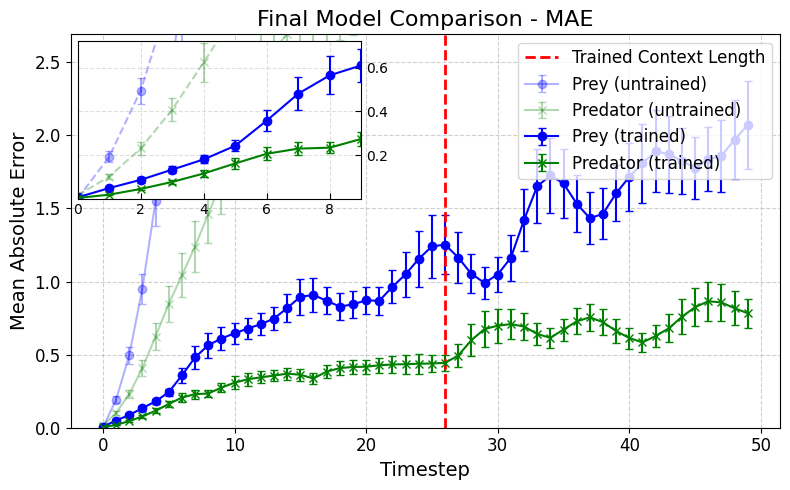

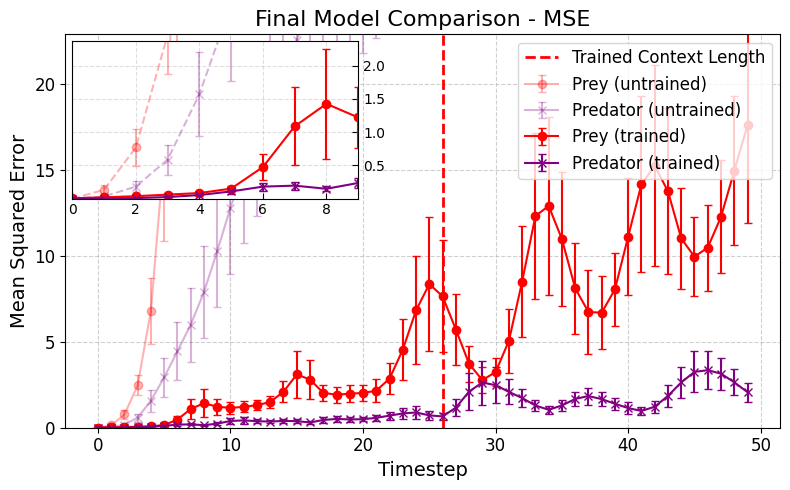

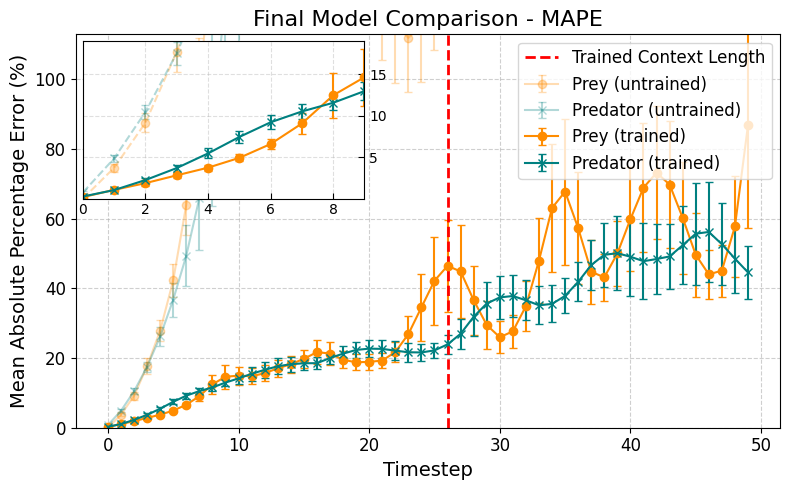

,Timestep,MAE Prey,MAE Predator,MSE Prey,MSE Predator,MAPE Prey (%),MAPE Predator (%)
0,0,0.007 ± 0.006 (-436.8%),0.004 ± 0.001 (74.9%),0.005 ± 0.005 (-6804.8%),0.000 ± 0.000 (85.7%),0.20 ± 0.18 (-1147.7%),0.27 ± 0.14 (64.2%)
1,1,0.049 ± 0.011 (74.3%),0.019 ± 0.002 (81.0%),0.020 ± 0.011 (85.1%),0.001 ± 0.000 (96.7%),1.07 ± 0.24 (71.3%),1.05 ± 0.14 (78.5%)
2,2,0.087 ± 0.014 (82.4%),0.045 ± 0.006 (80.3%),0.037 ± 0.018 (95.2%),0.008 ± 0.003 (95.8%),1.88 ± 0.30 (79.5%),2.25 ± 0.25 (78.5%)
3,3,0.134 ± 0.017 (86.0%),0.078 ± 0.011 (81.0%),0.060 ± 0.023 (97.6%),0.024 ± 0.009 (95.9%),2.82 ± 0.34 (84.0%),3.69 ± 0.42 (78.9%)
4,4,0.180 ± 0.019 (88.4%),0.116 ± 0.017 (81.4%),0.084 ± 0.021 (98.8%),0.054 ± 0.021 (96.6%),3.74 ± 0.37 (86.6%),5.46 ± 0.61 (79.2%)
5,5,0.243 ± 0.025 (89.3%),0.162 ± 0.024 (80.9%),0.150 ± 0.047 (99.1%),0.108 ± 0.040 (96.3%),4.92 ± 0.43 (88.4%),7.43 ± 0.77 (79.8%)
6,6,0.358 ± 0.048 (88.1%),0.206 ± 0.031 (80.2%),0.475 ± 0.196 (98.4%),0.180 ± 0.062 (95.9%),6.59 ± 0.61 (89.7%),9.20 ± 0.86 (81.4%)
7,7,0.481 ± 0.076 (87.1%),0.230 ± 0.031 (81.5%),1.086 ± 0.585 (97.7%),0.195 ± 0.061 (96.7%),9.06 ± 1.30 (90.6%),10.50 ± 0.91 (84.1%)
8,8,0.564 ± 0.086 (86.9%),0.234 ± 0.025 (84.0%),1.424 ± 0.827 (97.7%),0.148 ± 0.036 (98.1%),12.45 ± 2.74 (91.1%),11.55 ± 0.93 (87.1%)
9,9,0.610 ± 0.076 (87.2%),0.274 ± 0.033 (83.7%),1.220 ± 0.458 (98.4%),0.235 ± 0.073 (97.7%),14.63 ± 3.42 (92.1%),12.96 ± 1.04 (89.4%)


In [8]:
plot_model_errors_compare( prey_original_trained, predator_original_trained, prey_generated_trained,
    predator_generated_trained, prey_original_untrained, predator_original_untrained,
    prey_generated_untrained, predator_generated_untrained, draw_context=26,
    title_prefix="Final Model Comparison", scale=True)
   

# SAME PLOTS but formatted differently to show scale

/Users/jacobtutt/Desktop/MPhil_DIS/M2/Coursework_M2/src/analysis.py:746: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


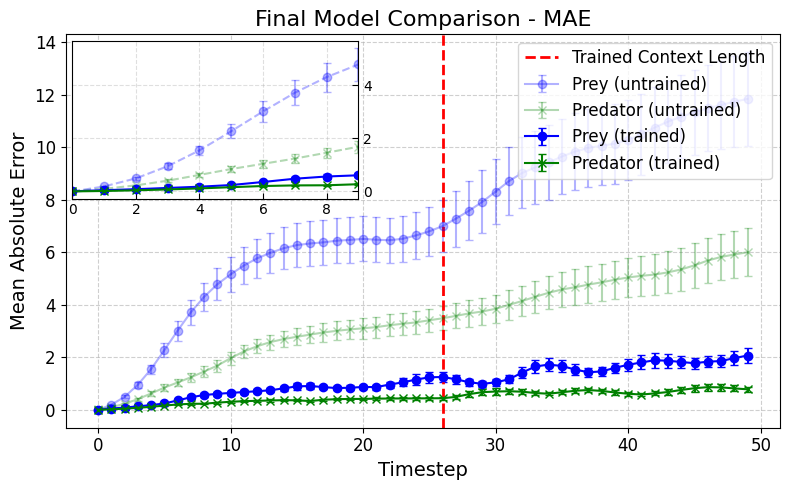

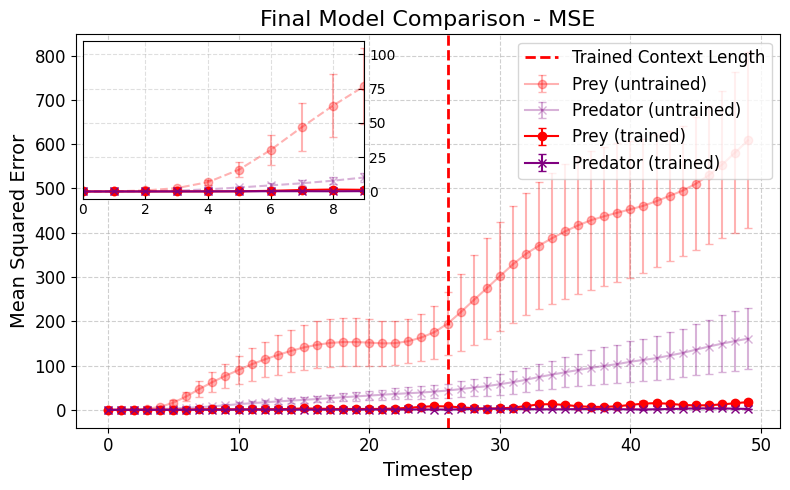

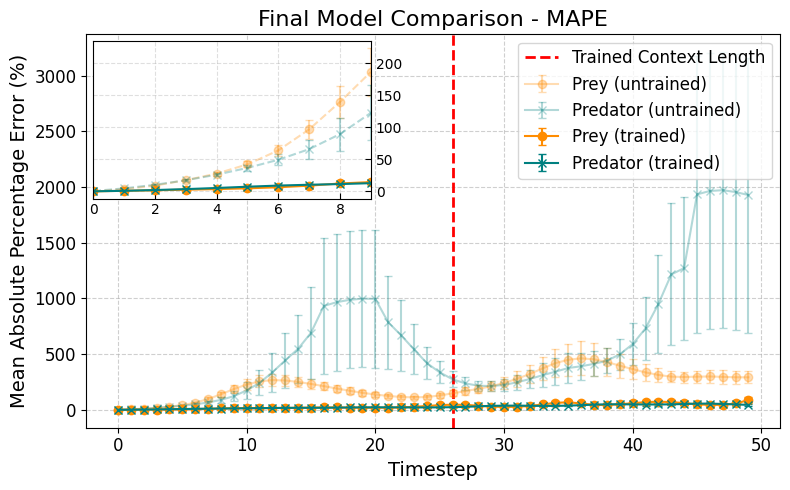

,Timestep,MAE Prey,MAE Predator,MSE Prey,MSE Predator,MAPE Prey (%),MAPE Predator (%)
0,0,0.007 ± 0.006 (-436.8%),0.004 ± 0.001 (74.9%),0.005 ± 0.005 (-6804.8%),0.000 ± 0.000 (85.7%),0.20 ± 0.18 (-1147.7%),0.27 ± 0.14 (64.2%)
1,1,0.049 ± 0.011 (74.3%),0.019 ± 0.002 (81.0%),0.020 ± 0.011 (85.1%),0.001 ± 0.000 (96.7%),1.07 ± 0.24 (71.3%),1.05 ± 0.14 (78.5%)
2,2,0.087 ± 0.014 (82.4%),0.045 ± 0.006 (80.3%),0.037 ± 0.018 (95.2%),0.008 ± 0.003 (95.8%),1.88 ± 0.30 (79.5%),2.25 ± 0.25 (78.5%)
3,3,0.134 ± 0.017 (86.0%),0.078 ± 0.011 (81.0%),0.060 ± 0.023 (97.6%),0.024 ± 0.009 (95.9%),2.82 ± 0.34 (84.0%),3.69 ± 0.42 (78.9%)
4,4,0.180 ± 0.019 (88.4%),0.116 ± 0.017 (81.4%),0.084 ± 0.021 (98.8%),0.054 ± 0.021 (96.6%),3.74 ± 0.37 (86.6%),5.46 ± 0.61 (79.2%)
5,5,0.243 ± 0.025 (89.3%),0.162 ± 0.024 (80.9%),0.150 ± 0.047 (99.1%),0.108 ± 0.040 (96.3%),4.92 ± 0.43 (88.4%),7.43 ± 0.77 (79.8%)
6,6,0.358 ± 0.048 (88.1%),0.206 ± 0.031 (80.2%),0.475 ± 0.196 (98.4%),0.180 ± 0.062 (95.9%),6.59 ± 0.61 (89.7%),9.20 ± 0.86 (81.4%)
7,7,0.481 ± 0.076 (87.1%),0.230 ± 0.031 (81.5%),1.086 ± 0.585 (97.7%),0.195 ± 0.061 (96.7%),9.06 ± 1.30 (90.6%),10.50 ± 0.91 (84.1%)
8,8,0.564 ± 0.086 (86.9%),0.234 ± 0.025 (84.0%),1.424 ± 0.827 (97.7%),0.148 ± 0.036 (98.1%),12.45 ± 2.74 (91.1%),11.55 ± 0.93 (87.1%)
9,9,0.610 ± 0.076 (87.2%),0.274 ± 0.033 (83.7%),1.220 ± 0.458 (98.4%),0.235 ± 0.073 (97.7%),14.63 ± 3.42 (92.1%),12.96 ± 1.04 (89.4%)


In [9]:
plot_model_errors_compare( prey_original_trained, predator_original_trained, prey_generated_trained,
    predator_generated_trained, prey_original_untrained, predator_original_untrained,
    prey_generated_untrained, predator_generated_untrained, draw_context=26,
    title_prefix="Final Model Comparison", scale=False)
   